In [31]:
label=[]
raw_image=[]

for line in open('./Homework/train.csv'):
#     line = f.readline()
    line = line.split(',')
#     print(line)
    if not(line[0].isdigit()):
        continue
    label.append(line[0])
    raw_image.append(line[1].split())    

    

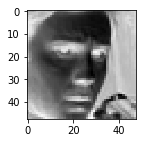

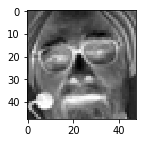

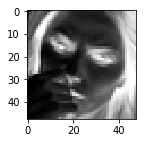

(22000, 48, 48)


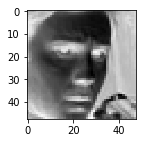

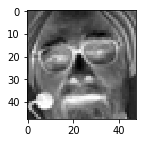

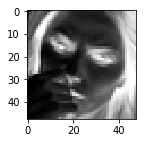

In [13]:
import numpy as np
temp = np.array(raw_image).reshape(len(raw_image),48,48).astype(np.int)
for i in range(3):
    plot_image(temp[i])

np.save("trainX", temp)

temp2 = np.load("trainX.npy")
print(temp2.shape)

for i in range(3):
    plot_image(temp[i])



In [4]:
temp_1 = np.array(label).reshape(len(label),1).astype(np.int)
print(temp_1[:10])


np.save("trainY", temp_1)

temp2_1 = np.load("trainY.npy")
print(temp2_1.shape)
print(temp2_1[:10])

# 0: mad, 1:disgust, 2: terrified, 3: happy, 4: sad, 5: suprised, 6: netural

NameError: name 'np' is not defined

In [5]:
import numpy as np
from keras.utils import np_utils  


trainX = np.load("trainX.npy")
print(type(trainX[0]), trainX.shape)
trainX = trainX/255
print(trainX[0])

trainY = np.load("trainY.npy")
print(type(trainY[0]), trainY.shape)
print(trainY[:5])

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 

trainY_oneHot = np_utils.to_categorical(trainY)  
print(trainY_oneHot.shape)

def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

<class 'numpy.ndarray'> (22000, 48, 48)
[[0.2745098  0.31372549 0.32156863 ... 0.20392157 0.16862745 0.16078431]
 [0.25490196 0.23921569 0.22745098 ... 0.21960784 0.20392157 0.17254902]
 [0.19607843 0.16862745 0.21176471 ... 0.19215686 0.21960784 0.18431373]
 ...
 [0.35686275 0.25490196 0.16470588 ... 0.28235294 0.21960784 0.16862745]
 [0.30196078 0.32156863 0.30980392 ... 0.41176471 0.2745098  0.18039216]
 [0.30196078 0.28235294 0.32941176 ... 0.41568627 0.42745098 0.32156863]]
<class 'numpy.ndarray'> (22000, 1)
[[0]
 [0]
 [2]
 [4]
 [6]]
(22000, 7)
[0 1 2 3 4 5 6]
[3062  355 3188 5529 3692 2376 3798]
[3.2658393207054215, 28.169014084507044, 3.136762860727729, 1.8086453246518357, 2.7085590465872156, 4.2087542087542085, 2.6329647182727753]


In [6]:
# shuffle the dataset

import numpy as np
def union_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


trainX, trainY = union_shuffled_copies(trainX, trainY)
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

[[4]
 [0]
 [1]
 [2]
 [6]]


In [17]:


from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

print(sss)       
print(sss.get_n_splits(X, y))

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# def stratified_sampling(data, label):
    
    

5
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [1 2] TEST: [3 0]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 2] TEST: [3 1]
TRAIN: [2 1] TEST: [3 0]
TRAIN: [3 1] TEST: [0 2]


(2000, 48, 48, 1)
(2000, 1)
(2000, 7)


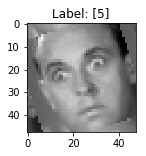

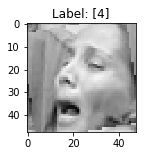

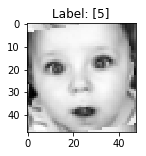

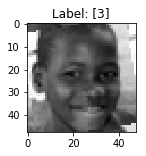

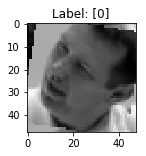

In [39]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# import glob
# import PIL

# datagen = ImageDataGenerator(fill_mode='wrap', rotation_range=20)
datagen = ImageDataGenerator(fill_mode='wrap', rotation_range=20)
datagen.fit(trainX)
counter=0
trainX_aug = []
trainY_aug = []
generate_amount=2000
for bx, by in datagen.flow(trainX, trainY, batch_size=1):
    counter+=1
    if counter>generate_amount: break

#     print(bx.shape, by.shape)
    bx=np.squeeze(bx, axis=3)
#     print(bx.shape, by.shape)
    bx=np.squeeze(bx, axis=0)
#     print(bx.shape, by.shape)
#     plot_image(bx)
    trainX_aug.append(bx)
    trainY_aug.append(by)

trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48, 1)
print(trainX_aug.shape)
# for t in temp:
#     plot_image(t)
trainY_aug = np.vstack(trainY_aug)
print(trainY_aug.shape)
trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY_aug[i])

In [35]:
%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  
    
    


KeyboardInterrupt: 

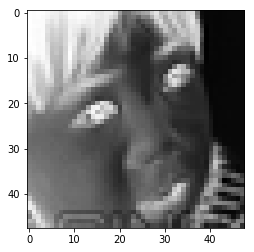

In [11]:

for ind in range(len(trainX)):
    plt.imshow(trainX[ind], cmap='binary')  
    plt.savefig("./images/sample_{}".format(str(ind)))

In [1]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=8,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(48, 48, 1),  
                 activation='relu'))  

model.add(Conv2D(filters=8,  
                 kernel_size=(5,5),  
                 padding='same',  
                 activation='relu'))  

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 activation='relu'))  

model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 activation='relu'))  

# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  

# Create CN layer 3 
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  
                 activation='relu'))  

model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same',  
                 activation='relu'))  

# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  


# Add Dropout layer  
model.add(Dropout(0.25))

model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 8)         208       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 8)         1608      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        6416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        12832     
__________

In [3]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization  
    
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=8,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(48, 48, 1)))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=8,  
                 kernel_size=(5,5),  
                 padding='same'))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 1 
model.add(Dropout(0.25))

  
# Create CN layer 2  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same'))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same'))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 2 
model.add(Dropout(0.25))

# Create CN layer 3 
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same'))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,  
                 kernel_size=(5,5),  
                 padding='same'))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 3
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 8)         208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 8)         1608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 8)         0         
__________

In [9]:
from keras import optimizers

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  

# tempX = np.vstack((trainX, trainX_aug))
# tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot_aug))
# print(tempX.shape, tempY.shape)
# 開始訓練  
train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=20, batch_size=100, verbose=2)  

Train on 17600 samples, validate on 4400 samples
Epoch 1/20
 - 217s - loss: 1.4494 - acc: 0.4293 - val_loss: 1.3675 - val_acc: 0.4659
Epoch 2/20


KeyboardInterrupt: 